In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import missingno as msno

In [2]:
# Store filepath in a variable
file = Path("Resources/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [3]:
# Read our data file with the Pandas library
raw_df = pd.read_csv(file)
raw_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


<Axes: >

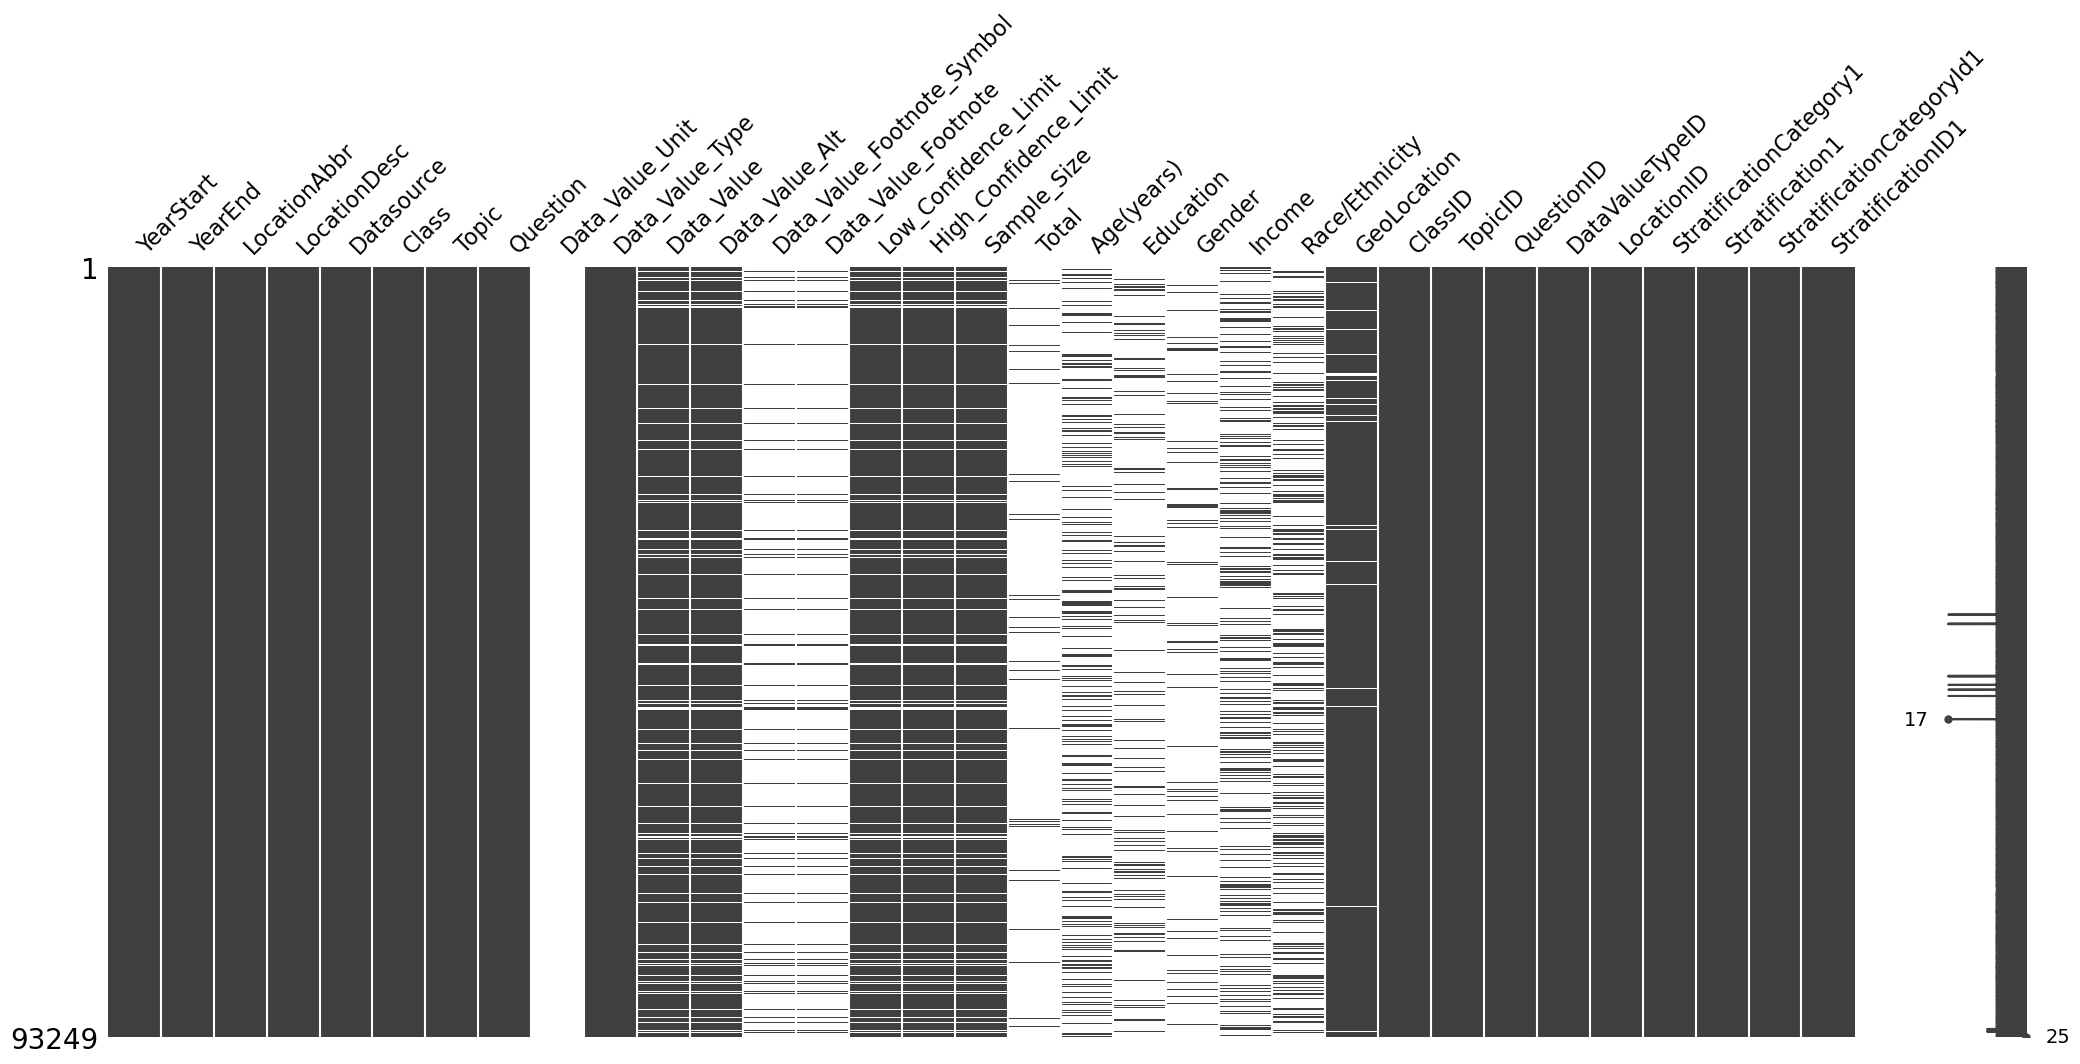

In [4]:
%matplotlib inline
msno.matrix(raw_df)

In [5]:
raw_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [6]:
# Delete specific columns using drop()
columns_to_drop = [
    'YearEnd', 'Datasource', 'Class', 'Topic', 'Data_Value_Unit',
    'Data_Value_Type', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
    'Data_Value_Footnote', 'Low_Confidence_Limit',
    'High_Confidence_Limit ', 'Sample_Size', 'Total', 'Age(years)',
    'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation',
    'ClassID', 'TopicID', 'DataValueTypeID', 'LocationID',
    'StratificationCategory1', 'StratificationCategoryId1']
dropped_df = raw_df.drop(columns=columns_to_drop)
dropped_df

,YearStart,LocationAbbr,LocationDesc,Question,Data_Value,QuestionID,Stratification1,StratificationID1
0,2020,US,National,Percent of adults who engage in no leisure-tim...,30.6,Q047,Hispanic,RACEHIS
1,2014,GU,Guam,Percent of adults aged 18 years and older who ...,29.3,Q036,High school graduate,EDUHSGRAD
2,2013,US,National,Percent of adults aged 18 years and older who ...,28.8,Q036,"$50,000 - $74,999",INC5075
3,2013,US,National,Percent of adults aged 18 years and older who ...,32.7,Q037,Data not reported,INCNR
4,2015,US,National,Percent of adults who achieve at least 300 min...,26.6,Q045,"Less than $15,000",INCLESS15
...,...,...,...,...,...,...,...,...
93244,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,24.5,Q037,"Less than $15,000",INCLESS15
93245,2022,WY,Wyoming,Percent of adults who engage in no leisure-tim...,36.0,Q047,Less than high school,EDUHS
93246,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,35.2,Q036,35 - 44,AGEYR3544
93247,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,35.3,Q037,"$35,000 - $49,999",INC3550


In [7]:
dropped_df.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'Question', 'Data_Value',
       'QuestionID', 'Stratification1', 'StratificationID1'],
      dtype='object')

In [8]:
#Reorganize 'QuestionID' to appear before 'Question' column
column_order = ['YearStart', 'LocationAbbr', 'LocationDesc', 'QuestionID', 'Question', 'Data_Value', 'Stratification1', 'StratificationID1']
dropped_df = dropped_df[column_order]
dropped_df

,YearStart,LocationAbbr,LocationDesc,QuestionID,Question,Data_Value,Stratification1,StratificationID1
0,2020,US,National,Q047,Percent of adults who engage in no leisure-tim...,30.6,Hispanic,RACEHIS
1,2014,GU,Guam,Q036,Percent of adults aged 18 years and older who ...,29.3,High school graduate,EDUHSGRAD
2,2013,US,National,Q036,Percent of adults aged 18 years and older who ...,28.8,"$50,000 - $74,999",INC5075
3,2013,US,National,Q037,Percent of adults aged 18 years and older who ...,32.7,Data not reported,INCNR
4,2015,US,National,Q045,Percent of adults who achieve at least 300 min...,26.6,"Less than $15,000",INCLESS15
...,...,...,...,...,...,...,...,...
93244,2022,WY,Wyoming,Q037,Percent of adults aged 18 years and older who ...,24.5,"Less than $15,000",INCLESS15
93245,2022,WY,Wyoming,Q047,Percent of adults who engage in no leisure-tim...,36.0,Less than high school,EDUHS
93246,2022,WY,Wyoming,Q036,Percent of adults aged 18 years and older who ...,35.2,35 - 44,AGEYR3544
93247,2022,WY,Wyoming,Q037,Percent of adults aged 18 years and older who ...,35.3,"$35,000 - $49,999",INC3550


In [9]:
trimmed_df = dropped_df[~dropped_df['LocationDesc'].str.contains('Guam|Virgin Islands|Puerto Rico')]
trimmed_df

,YearStart,LocationAbbr,LocationDesc,QuestionID,Question,Data_Value,Stratification1,StratificationID1
0,2020,US,National,Q047,Percent of adults who engage in no leisure-tim...,30.6,Hispanic,RACEHIS
2,2013,US,National,Q036,Percent of adults aged 18 years and older who ...,28.8,"$50,000 - $74,999",INC5075
3,2013,US,National,Q037,Percent of adults aged 18 years and older who ...,32.7,Data not reported,INCNR
4,2015,US,National,Q045,Percent of adults who achieve at least 300 min...,26.6,"Less than $15,000",INCLESS15
6,2012,WY,Wyoming,Q037,Percent of adults aged 18 years and older who ...,48.5,American Indian/Alaska Native,RACENAA
...,...,...,...,...,...,...,...,...
93244,2022,WY,Wyoming,Q037,Percent of adults aged 18 years and older who ...,24.5,"Less than $15,000",INCLESS15
93245,2022,WY,Wyoming,Q047,Percent of adults who engage in no leisure-tim...,36.0,Less than high school,EDUHS
93246,2022,WY,Wyoming,Q036,Percent of adults aged 18 years and older who ...,35.2,35 - 44,AGEYR3544
93247,2022,WY,Wyoming,Q037,Percent of adults aged 18 years and older who ...,35.3,"$35,000 - $49,999",INC3550


In [10]:
#remove NA Data value
cleaned_df = trimmed_df.dropna(subset=['Data_Value'])

In [11]:
cleaned_df = cleaned_df.sort_values(by=["YearStart", "QuestionID", "StratificationID1"], ascending=[False, True, True])
cleaned_df

,YearStart,LocationAbbr,LocationDesc,QuestionID,Question,Data_Value,Stratification1,StratificationID1
7208,2022,US,National,Q036,Percent of adults aged 18 years and older who ...,20.5,18 - 24,AGEYR1824
8494,2022,VT,Vermont,Q036,Percent of adults aged 18 years and older who ...,14.7,18 - 24,AGEYR1824
72417,2022,AL,Alabama,Q036,Percent of adults aged 18 years and older who ...,19.8,18 - 24,AGEYR1824
77592,2022,ID,Idaho,Q036,Percent of adults aged 18 years and older who ...,25.0,18 - 24,AGEYR1824
88789,2022,AK,Alaska,Q036,Percent of adults aged 18 years and older who ...,24.5,18 - 24,AGEYR1824
...,...,...,...,...,...,...,...,...
71366,2011,AR,Arkansas,Q047,Percent of adults who engage in no leisure-tim...,31.0,Non-Hispanic White,RACEWHT
71679,2011,TX,Texas,Q047,Percent of adults who engage in no leisure-tim...,25.0,Non-Hispanic White,RACEWHT
71686,2011,GA,Georgia,Q047,Percent of adults who engage in no leisure-tim...,25.5,Non-Hispanic White,RACEWHT
73897,2011,IA,Iowa,Q047,Percent of adults who engage in no leisure-tim...,25.3,Non-Hispanic White,RACEWHT


In [12]:
cleaned_df.to_csv("Resources/DNPAO_cleaned.csv", index=False)